# 색공간

색의 3속성인 색상(hue), 명도(lightness), 채도(chroma)를 3차원 공간의 각각의 축으로 형성된 색 공간은 컬러 디자인이나 컬러 공학 등의 학문 또는 산업분야에서 컬러를 다루는 데 있어서 기본적으로 이해하여야 할 개념이다.

빨강, 노랑, 초록, 파랑, 보라 등으로 구분되는 색을 나타내는 색상(hue)은 색 공간을 지구로 비유할 경우 적도 상에서 경도 즉, 색상각(hue angle)으로 표현, 0도~360도의 범위를 가지며, 시계 방향으로 변화된다. 또한 이 색 공간은 대응색(opponent color) 관계를 쉽게 나타낸다. 대응색 관계란 명도 축을 기준으로 대칭의 위치에 있는 두 색의 관계를 말하며 서로 보색 관계에 있을 나타낸다.

모든 색들의 밝고 어둠을 나타내는 명도(lightness)는 색 공간을 지구로 비유할 경우 남극과 북극을 연결하는 축으로서 남극을 검은색, 북극을 흰색으로 하며 그 사이에는 회색들로 배열된다.

모든 색들의 깨끗한 정도를 나타내는 채도(chroma, saturation)는 색 공간의 명도축을 0으로 하고 적도에 가까이 갈수록 커진다.

색 공간의 중요한 용도 가운데 하나는 색차 계산(color difference)이다. 이는 색 공간에 존재하는 두 점 즉, 두 색들 사이의 거리를 계산하여 공학적으로 활용한다. 예를 들면 컬러 영상 분할(color image segmentation)은 CIELAB 색 공간에서 색차 계산 결과를 이용하여 CIELAB 색 공간에서 영상 분할이 이루어져야 한다. 그러나 간혹 컬러 영상 분할에 관한 연구 논문들 중에는 RGB 데이터를 바탕으로 색차 계산한 결과를 가지고 RGB 데이터로 영상분할을 한 논문들이 발견되곤 하는데 이는 치명적인 오류에 해당된다. 왜냐하면 컬러 영상 장비에서 다루는 RGB는 시각의 RGB가 아니고 단지 코드에 불과할 뿐 아니라 균등색 공간(uniform color space)도 아니기 때문에 공학적인 계산은 의미가 없을 뿐만 아니라 부정확하기 때문이다.

또, 다른 색 공간의 응용에는 색감에 따른 색의 배열이나 배치(grouping)가 있다. 각종 산업 디자인에 흔히 쓰이고 있는 색감 즉, 따뜻한 색, 차가운 색 등의 배열이나 배치는 CIELAB 색 공간에서 좌표로 다룰 경우 개념이 분명해질 뿐만 아니라 정확성이 보장된다. 그러나 CIELAB 색 공간은 CIEXYZ 색 공간으로 변환한 다음 다시 RGB나 CMY 데이터로 변환해야 하는 필수적인 과정이 있다. 문제는 이러한 과정이 쉽거나 단순하지 않다는 데 있다. 이는 색 이론을 적용함으로써 해결할 수 있다.

## 바이너리

한 개의 픽셀을 두 가지 값으로만 표현한 이미지를 바이너리(binary, 이진) 이미지라고 한다. 두 가지 값은 $[0,1]$ 또는 $[0,255]$를 사용한다. 0은 검은색, 1은 흰색을 나타낸다. 표현할 수 있는 값이 두 가지밖에 없어서 명암을 표현할 수 없고 점의 밀도로 명암을 표현한다. 영상 작업에서 피사체의 색상과 명암 정보는 필요없고 오직 피사체의 모양 정보만 필요할 때 이런 이미지를 사용한다. 


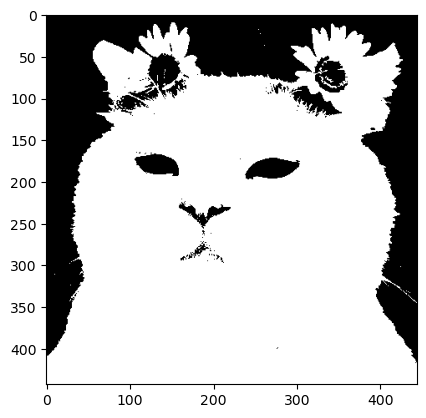

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./img/cat-01.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.threshold(image, 125, 255, cv2.THRESH_BINARY)[1]
image = image.astype(np.uint8)
plt.imshow(image, cmap='gray')
plt.show()

## 그레이스케일

흔히 우리가 흑백 사진이라고 하는 것이 그레이 스케일 이미지이다. 그레이 스케일 이미지는 한 개의 픽셀 값이 0에서 255의 사이 값으로 표현한다. 픽셀 값의 크기로 명암을 표현하며 0은 가장 어두운 검은색이고 점점 커질수록 밝은 색을 의미한다. 그레이 스케일은 음수가 없어서 부호 없는 1바이트의 크기로 표현한다. 영상 처리에서 색상 정보가 쓸모없을 때 컬러 이미지의 색상 정보를 제거함으로써 연산량을 줄이기 위해 사용한다.

### 이미지의 밝기 조절

이미지의 밝기 조절이란 이미지의 전체적인 밝기를 조절하여 좀 더 밝거나 어두운 이미지를 만드는 작업이다. 이미지의 밝기를 조절하려면 입력 이미지의 모든 픽셀에 일정 값을 더하거나 빼는 작업을 수행한다. 모든 픽셀에 양수 값을 더하면 이미지의 밝기가 밝아지고, 반대로 양수 값을 빼면 이미지가 어두워진다. 

CIELAB 색 공간: Lab 색 공간은 인간 시각의 길항 이론에 의거하여, CIE XYZ 색 공간을 비선형 변환하여 만들어진 색 공간이다.

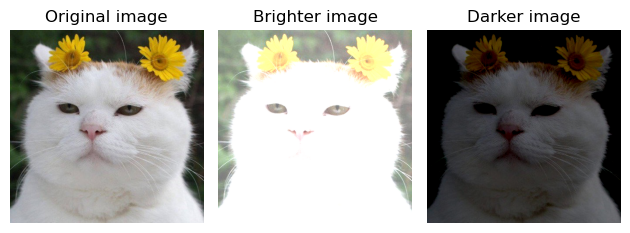

In [31]:
import cv2
import skimage
import matplotlib.pyplot as plt
from skimage import io
from skimage import color

image = io.imread('./img/cat-01.jpg')

plt.figure()
plt.subplot(131)
plt.imshow(image) 
plt.axis('off')
plt.title('Original image')

image1 = color.rgb2lab(image)
image1[...,0] = image1[...,0] + 50
image1 = color.lab2rgb(image1)
plt.subplot(132)
plt.imshow(image1)
plt.axis('off')
plt.title('Brighter image')

image1 = color.rgb2lab(image)
image1[...,0] = image1[...,0] - 50
image1 = color.lab2rgb(image1)
plt.subplot(133)
plt.imshow(image1)
plt.axis('off')
plt.title('Darker image')
plt.tight_layout()
plt.show()

```python
import cv2
import numpy as np


image1 = cv2.imread('cat-01.jpg')
image2 = image1.astype(np.uint16)
b, g, r = cv2.split(image2)
gray1 = ((b+g+r)/3).astype(np.uint8)

gray2 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

cv2.imshow('raw', image1)
cv2.imshow('gray1', gray1)
cv2.imshow('gray2', gray2)

cv2.waitKey(0)
cv2.destroyAllWindows()
```

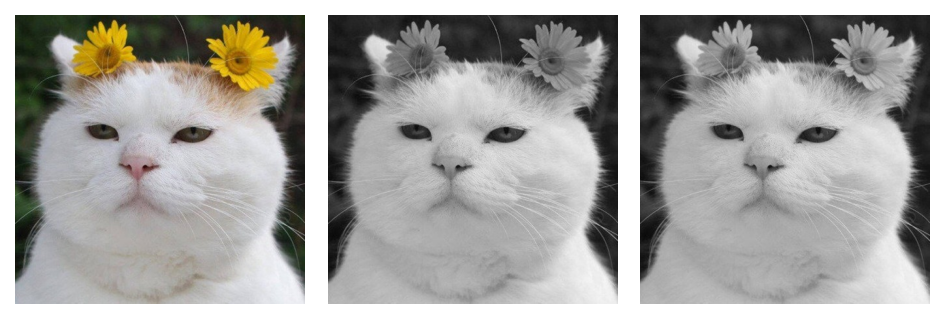

In [35]:
import cv2
import matplotlib.pyplot as plt

image1 = cv2.imread('./img/cat-01.jpg')
image2 = image1.astype(np.uint16)
b, g, r = cv2.split(image2)
gray1 = ((b+g+r)/3).astype(np.uint8)

gray2 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

image1 = image1[:,:,::-1]

image2 = np.zeros((gray1.shape[0], gray1.shape[1], 3), dtype=np.uint8)
image2[:,:,0] = gray1
image2[:,:,1] = gray1
image2[:,:,2] = gray1

image2 = np.zeros((gray1.shape[0], gray1.shape[1], 3), dtype=np.uint8)
image2[:,:,0] = gray1
image2[:,:,1] = gray1
image2[:,:,2] = gray1

image3 = np.expand_dims(gray2, axis=-1) * np.ones((1,1,3))
image3 = image3.astype(np.uint8)

fig, axes = plt.subplots(1, 3, dpi=150)

for i, image in enumerate([image1, image2, image3]):
    axes[i].imshow(image)
    axes[i].axis('off')

fig.tight_layout()
plt.show()

<class 'numpy.ndarray'>


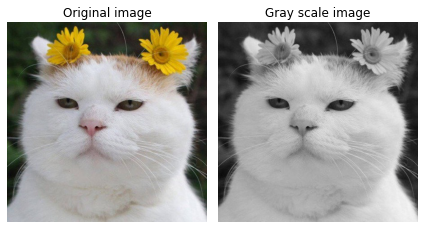

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
%matplotlib inline

image = io.imread('./img/cat-01.jpg')
print(type(image))

image1 = color.rgb2lab(image)
image1[...,1] = image1[...,2] = 0
image1 = color.lab2rgb(image1)

fig, axes = plt.subplots(ncols=2)
axes[0].imshow(im)
axes[0].axis('off')
axes[0].set_title('Original image')
axes[1].imshow(im1)
axes[1].axis('off')
axes[1].set_title('Gray scale image')
fig.tight_layout()
plt.show()

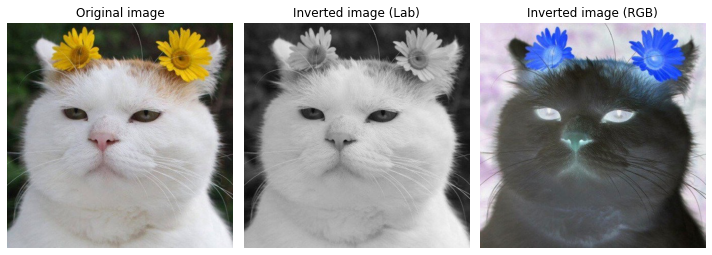

In [86]:
from skimage.util import invert

image = io.imread('./img/cat-01.jpg')
image1 = rgb2lab(image)
image1[...,0] = np.max(image1[...,0]) - image1[...,0]
image1 = lab2rgb(image1)

plt.figure(figsize=(10,4))
plt.subplot(131)
plt.imshow(im)
plt.axis('off')
plt.title('Original image')

plt.subplot(132)
plt.imshow(im1)
plt.axis('off')
plt.title('Inverted image (Lab)')

plt.subplot(133)
plt.imshow(invert(im))
plt.axis('off')
plt.title('Inverted image (RGB)')
plt.tight_layout()
plt.show()

디지털화된 이미지는 픽셀(화소)이라는 단위가 여러 개 모여서 그림으로 표현한다. 하나의 픽셀을 어떻게 구성하느냐에 따라 이미지를 구분한다.

## RGB

컴퓨터로 색상을 표현하는 방법 중 RGB(red, green, blue) 컬러 스페이스이다. RGB는 빛의 3원소인 빨강, 초록, 파랑 세가지 색의 빛을 섞어서 원하는 색을 표현한다.


<div>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/RGBCube_b.svg/400px-RGBCube_b.svg.png" style="height: 200px" />
</div>

각 색상은 0-255 범위로 표현하고 값이 커질수록 해당 색상의 빛이 밝아지는 원리로 색상값은 모두 255일때 흰색이되고 0일때 검은색으로 표현한다. 세가지 색상을 표현하므로 RGB 이미지는 3차원 배열로 표현한다.

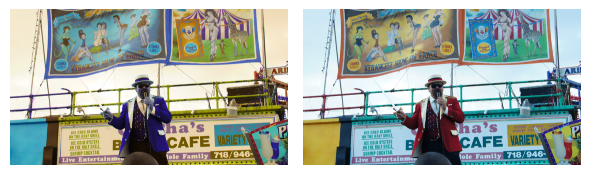

In [88]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

image1 = cv2.imread('./img/man.jpeg')
image2 = Image.open('./img/man.jpeg')
    
fig, (ax1, ax2) = plt.subplots(ncols=2, dpi=100)
ax1.imshow(image1)
ax2.imshow(image2)
ax1.axis('off')
ax2.axis('off')
fig.tight_layout()
plt.show()

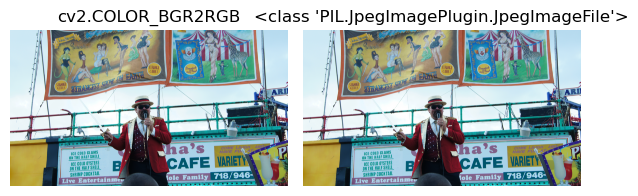

In [87]:
# cv2.IMREAD_UNCHANGED
image1 = cv2.imread('./img/man.jpeg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = Image.open('./img/man.jpeg')
    
fig, (ax1, ax2) = plt.subplots(ncols=2, dpi=100)
ax1.imshow(image1)
ax2.imshow(image2)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('cv2.COLOR_BGR2RGB')
ax2.set_title(type(image2))
fig.tight_layout()
plt.show()

## HSV

HSV는 색상(hue), 채도(saturation), 명도(value)로 색을 표현하는 방식이다. 색상은 빨간색, 노란색, 녹색가 같은 색의 종류를 의미하고, 채도는 색의 순도를 나타낸다. 즉, 빨간색에 대하여 채도가 높으면 맑은 선홍색이고 채도가 낮으면 탁한 빨간색으로 보인다. 명도는 빛의 세기로 명도가 높으면 밝고, 명도가 낮으면 어둡게 느껴진다.


HSV(Hue, Saturation, Value) 색공간에서는 색이 다음 세가지 값으로 표현된다.

색상(Hue): 색상값 H는 가시광선 스펙트럼을 주파수 별로 고리모양으로 배치했을 때의 각도이다. 0°~360°의 범위를 갖고 360°와 0°는 빨강을 가리킨다.
채도(Saturation): 채도값 S는 특정한 색상의 진함의 정도를 나타낸다. 가장 진한 상태를 100%이고 0%는 같은 명도의 무채색이다.
명도(Value): 명도값 V는 밝은 정도를 나타낸다. 순수한 흰색, 빨간색은 100%이고 검은색은 0%이다.

<div>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f1/HSV_cone.jpg/400px-HSV_cone.jpg" style="height: 200px;" />
</div>


In [50]:
import cv2
import numpy as np

red_bgr = np.array([[[0, 0, 255]]], dtype=np.uint8)
green_bgr = np.array([[[0, 255, 0]]], dtype=np.uint8)
blue_bgr = np.array([[[255, 0, 0]]], dtype=np.uint8)
yellow_bgr = np.array([[[0, 255, 255]]], dtype=np.uint8)

red_hsv = cv2.cvtColor(red_bgr, cv2.COLOR_BGR2HSV)
green_hsv = cv2.cvtColor(green_bgr, cv2.COLOR_BGR2HSV)
blue_hsv = cv2.cvtColor(blue_bgr, cv2.COLOR_BGR2HSV)
yellow_hsv = cv2.cvtColor(yellow_bgr, cv2.COLOR_BGR2HSV)

print(f'red BGR: {red_bgr} - HSV {red_hsv}')
print(f'green BGR: {green_bgr} - HSV {green_hsv}')
print(f'blue BGR: {blue_bgr} - HSV {blue_hsv}')
print(f'yellow BGR: {yellow_bgr} - HSV {yellow_hsv}')

red RGB: [[[  0   0 255]]] - HSV [[[  0 255 255]]]
green RGB: [[[  0 255   0]]] - HSV [[[ 60 255 255]]]
blue RGB: [[[255   0   0]]] - HSV [[[120 255 255]]]
yellow RGB: [[[  0 255 255]]] - HSV [[[ 30 255 255]]]


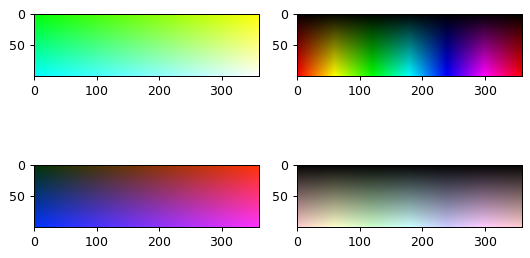

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

v, h = np.mgrid[0:1:100j, 0:1:360j]
s = np.ones_like(V)

hsv_s100 = np.dstack((h, s * 1.0, v))
rgb_s100 = hsv_to_rgb(hsv_s100)

hsv_s20 = np.dstack((h, s * 0.2, v))
rgb_s20 = hsv_to_rgb(hsv_s20)

fig, axes = plt.subplots(nrows=2, ncols=2, dpi=90)
axes[0, 0].imshow(hsv_s100)
axes[0, 1].imshow(rgb_s100)
axes[1, 0].imshow(hsv_s20)
axes[1, 1].imshow(rgb_s20)
fig.tight_layout()
plt.show()

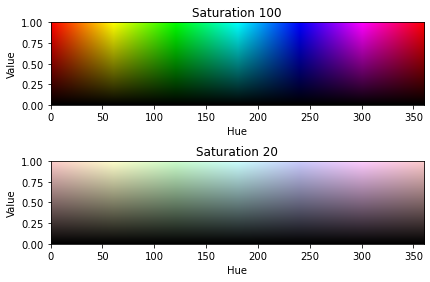

In [75]:
plt.subplot(211)
plt.imshow(rgb_s100, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel('Hue')
plt.ylabel('Value')
plt.title('Saturation 100')
plt.grid(False)

plt.subplot(212)
plt.imshow(rgb_s20, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel('Hue')
plt.ylabel('Value')
plt.title('Saturation 20')
plt.grid(False)

plt.tight_layout()
plt.show()

## YCrCb

YUV는 컬러 이미지 파이프라인의 일부로 사용되는 색 인코딩 시스템이다. 컬러 이미지나 비디오 토킹 지각 변환을 통해 색차 컴포넌트의 대역폭 감소를 가능케 하므로 일반적으로 직접적인 RGB 표현을 사용할 때보다 전송 오류나 압축 가공물을 더 효율적으로 마스킹될 수 있게 한다. 다른 색 인코딩들은 비슷한 특성을 갖고 있으며 YUV의 속성을 구현하고 탐구하는 주된 이유는 특정 Y'UV 표준을 준수하는 아날로그, 디지털 텔레비전이나 사진 장비와의 통신을 위해서이다. YCrCb에서 Y 성분은 밝기 또는 휘도(luminance)를 뜻하며 Cr과 Cb는 색상 또는 색차(chrominance) 정보를 나타낸다. RGB 색상 성분으로부터 Y 성분을 계산하는 공식은 그레이스케일 계산 공식과 같다.

![wikipedia](./img/color-space-ycrcb.png)

In [52]:
import cv2
import numpy as np

dark = np.array([[[0, 0, 0]]], dtype=np.uint8)
middle = np.array([[[127, 127, 127]]], dtype=np.uint8)
bright = np.array([[[255, 255, 255]]], dtype=np.uint8)

dark_yuv = cv2.cvtColor(dark, cv2.COLOR_BGR2YUV)
middle_yuv = cv2.cvtColor(middle, cv2.COLOR_BGR2YUV)
bright_yuv = cv2.cvtColor(bright, cv2.COLOR_BGR2YUV)

print(f'dark BGR: {dark} - YUV {dark_yuv}')
print(f'middle BGR: {middle} - YUV {middle_yuv}')
print(f'bright BGR: {bright} - YUV {bright_yuv}')

dark BGR: [[[0 0 0]]] - YUV [[[  0 128 128]]]
middle BGR: [[[127 127 127]]] - YUV [[[127 128 128]]]
bright BGR: [[[255 255 255]]] - YUV [[[255 128 128]]]


## CMYK

CMYK 색 공간은 인쇄과정에서 쓰이는 감산 혼합 방식으로, 흰 바탕에 네 가지 잉크의 조합으로 색을 나타내는 것을 말한다. 색을 혼합하면 명도가 낮아지기에 감산 혼합이라고 한다. CMYK는 인쇄에 쓰이는 4가지 색은 옥색(Cyan), 자홍색(Magenta), 노랑(Yellow), 검정(Black)을 뜻한다.

<div>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/52/Synthese-.svg/400px-Synthese-.svg.png" style="height: 200px;" />
</div>

In [57]:
[i for i in dir(cv2) if i.startswith('COLOR_')][:10]

['COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGBA',
 'COLOR_BAYER_BG2RGB_EA',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_GB2BGR']

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt

bck = cv2.imread("images/fish_bg.png")
img = cv2.imread("images/fish.png")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask = cv2.inRange(hsv, (5, 75, 25), (25, 255, 255))

## slice the orange fish
imask = mask>0
orange = np.zeros_like(img, np.uint8)
orange[imask] = img[imask]

yellow = img.copy()
hsv[...,0] = hsv[...,0] + 20
yellow[imask] = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)[imask]
yellow = np.clip(yellow, 0, 255)

bckfish = cv2.bitwise_and(bck,bck, mask=imask.astype(np.uint8))
nofish = img.copy()
nofish = cv2.bitwise_and(nofish,nofish, mask=(np.bitwise_not(imask)).astype(np.uint8))
nofish = nofish + bckfish

plt.figure(figsize=(20,12))
plt.subplots_adjust(0,0,1,0.9,0.01,0.075)
plt.subplot(221), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('original', size=20)
plt.subplot(222), plt.imshow(cv2.cvtColor(orange, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('only fish', size=20)
plt.subplot(223), plt.imshow(cv2.cvtColor(yellow, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('fish color changed', size=20)
plt.subplot(224), plt.imshow(cv2.cvtColor(nofish, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('transparent fish', size=20)
plt.suptitle('Color Detection with opencv-python', size=25)
plt.show()